In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv("/kaggle/input/weather-cleaned/Weather_Cleaned.csv")

df.head(14)

,Date,Time,Weather,Temp (°C),Rain (mm),Cloud (%),Pressure (mb),Wind (km/h),Gust (km/h)
0,2009-01-01,00:00,patchy rain possible,15,0.4,100,1021,17,32
1,2009-01-01,03:00,moderate rain at times,16,0.7,100,1021,20,34
2,2009-01-01,06:00,heavy rain at times,15,1.0,100,1021,18,32
3,2009-01-01,09:00,moderate rain at times,16,0.9,100,1023,20,34
4,2009-01-01,12:00,moderate rain at times,15,0.8,100,1021,17,36
5,2009-01-01,15:00,moderate rain at times,15,0.8,100,1020,17,36
6,2009-01-01,18:00,patchy rain possible,14,0.4,100,1021,14,33
7,2009-01-01,21:00,patchy rain possible,15,0.2,100,1023,17,31
8,2009-01-02,00:00,patchy rain possible,16,0.2,100,1022,15,28
9,2009-01-02,03:00,moderate rain at times,16,0.6,100,1021,17,31


In [2]:
# Chỉ lấy datetime và temp
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df[["Datetime", "Temp (°C)"]].copy()
df.columns = ["datetime", "temp"]
df["datetime"] = pd.to_datetime(df["datetime"])
df["temp"] = pd.to_numeric(df["temp"], errors="coerce")
df.dropna(inplace=True)

# Đặt datetime làm chỉ mục
df.set_index("datetime", inplace=True)
df[-14:]

,temp
datetime,
2024-12-30 06:00:00,16
2024-12-30 09:00:00,18
2024-12-30 12:00:00,20
2024-12-30 15:00:00,19
2024-12-30 18:00:00,19
2024-12-30 21:00:00,19
2024-12-31 00:00:00,18
2024-12-31 03:00:00,18
2024-12-31 06:00:00,19


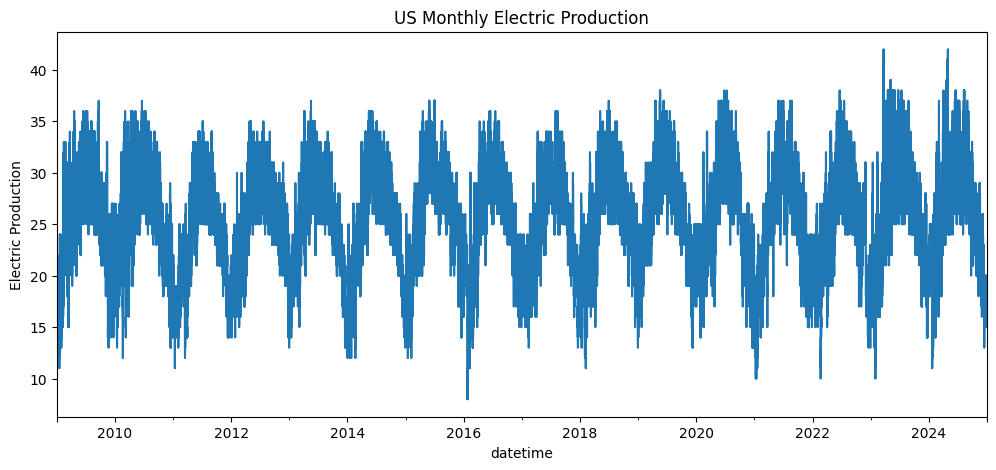

In [3]:
import matplotlib.pyplot as plt

df['temp'].plot(figsize=(12, 5), title='US Monthly Electric Production')
plt.ylabel("Electric Production")
plt.show()

In [5]:
# df = df.resample('D').mean()
df.fillna(df.mean())
# df_split = df[-730:]
df_split = df

In [6]:
df_split

,temp
datetime,
2009-01-01 00:00:00,15
2009-01-01 03:00:00,16
2009-01-01 06:00:00,15
2009-01-01 09:00:00,16
2009-01-01 12:00:00,15
...,...
2024-12-31 09:00:00,19
2024-12-31 12:00:00,19
2024-12-31 15:00:00,19


In [7]:
num_day = 30

train_df = df_split[:-num_day*8]
test_df = df_split[-num_day*8:]

In [8]:
train_df

,temp
datetime,
2009-01-01 00:00:00,15
2009-01-01 03:00:00,16
2009-01-01 06:00:00,15
2009-01-01 09:00:00,16
2009-01-01 12:00:00,15
...,...
2024-12-01 09:00:00,20
2024-12-01 12:00:00,24
2024-12-01 15:00:00,23


In [9]:
train_df = train_df.copy()  # Đảm bảo tạo bản sao
train_df["diff"] = train_df["temp"].diff()

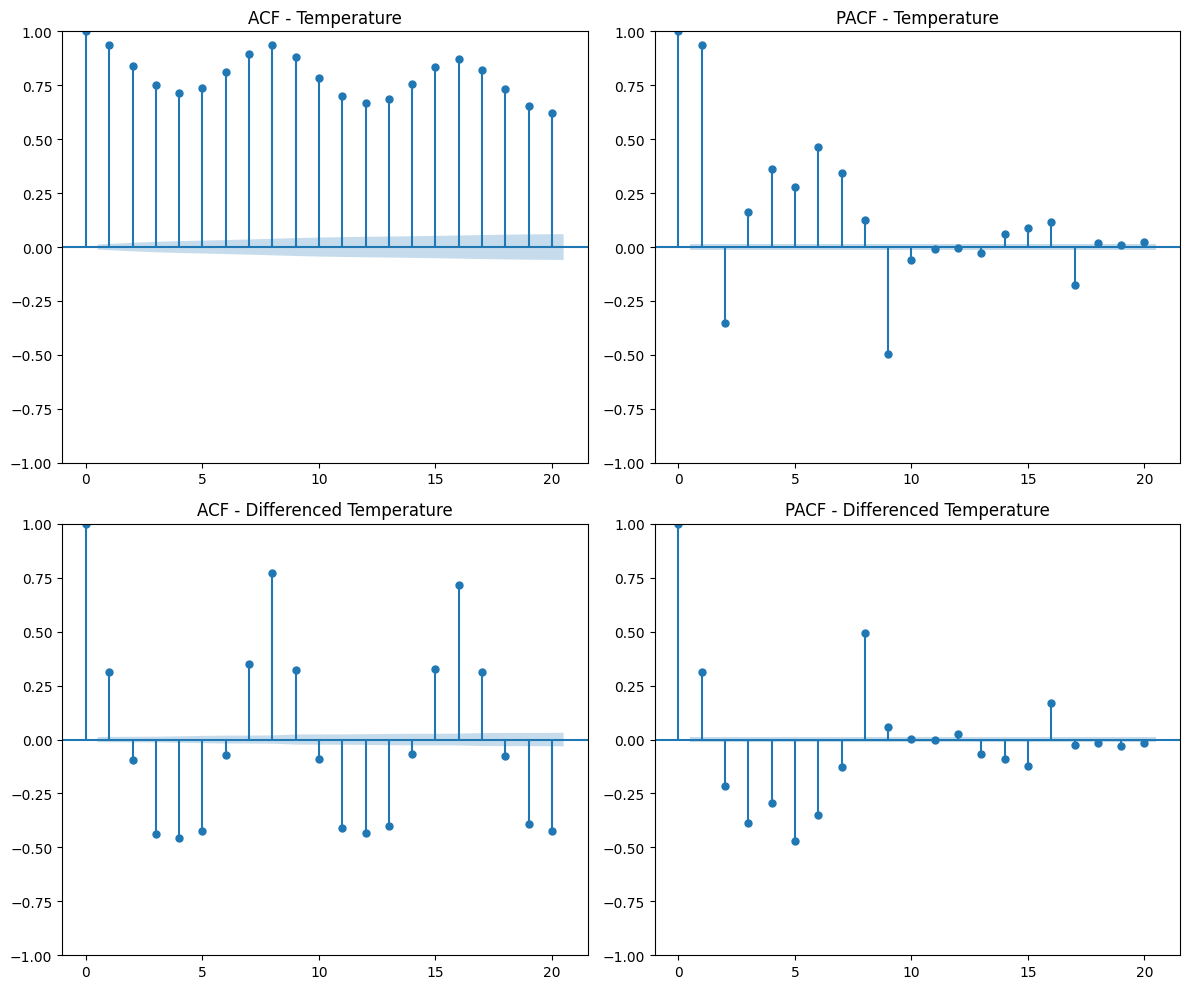

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Dữ liệu
temp_series = train_df['temp'].dropna()
diff_series = train_df['diff'].dropna()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ACF của temp
plot_acf(temp_series, ax=axes[0, 0], lags=20, alpha=0.01)
axes[0, 0].set_title('ACF - Temperature')

# PACF của temp
plot_pacf(temp_series, ax=axes[0, 1], lags=20, method='ywm', alpha=0.01)
axes[0, 1].set_title('PACF - Temperature')

# ACF của diff
plot_acf(diff_series, ax=axes[1, 0], lags=20, alpha=0.01)
axes[1, 0].set_title('ACF - Differenced Temperature')

# PACF của diff
plot_pacf(diff_series, ax=axes[1, 1], lags=20, method='ywm', alpha=0.01)
axes[1, 1].set_title('PACF - Differenced Temperature')

plt.tight_layout()
plt.show()

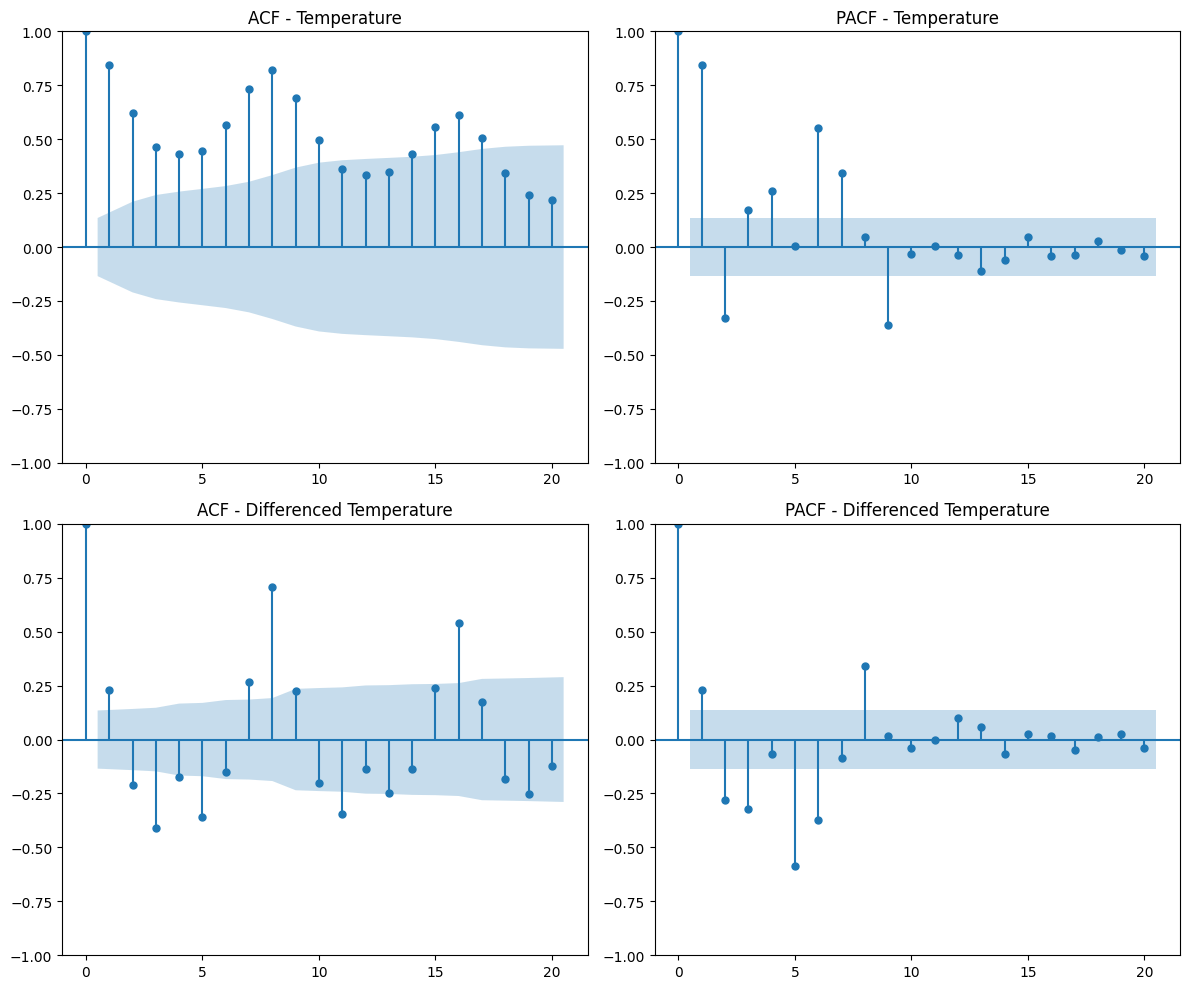

In [11]:
temp_series = train_df['temp'][-365:].dropna()
diff_series = train_df['diff'][-365:].dropna()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ACF của temp
plot_acf(temp_series, ax=axes[0, 0], lags=20, alpha=0.01)
axes[0, 0].set_title('ACF - Temperature')

# PACF của temp
plot_pacf(temp_series, ax=axes[0, 1], lags=20, method='ywm', alpha=0.01)
axes[0, 1].set_title('PACF - Temperature')

# ACF của diff
plot_acf(diff_series, ax=axes[1, 0], lags=20, alpha=0.01)
axes[1, 0].set_title('ACF - Differenced Temperature')

# PACF của diff
plot_pacf(diff_series, ax=axes[1, 1], lags=20, method='ywm', alpha=0.01)
axes[1, 1].set_title('PACF - Differenced Temperature')

plt.tight_layout()
plt.show()

In [12]:
#ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

try:
    model = ARIMA(train_df["temp"], 
                    order=(3, 1, 5), 
                 )
    model_fit = model.fit()
    print(model_fit.summary())
except Exception as e:
    print(f"ARIMA model failed, ERR:{e}" )
    pass

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                46512
Model:                 ARIMA(3, 1, 5)   Log Likelihood              -69236.051
Date:                Fri, 04 Apr 2025   AIC                         138490.103
Time:                        05:31:21   BIC                         138568.830
Sample:                    01-01-2009   HQIC                        138514.847
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4207      0.001    657.755      0.000       0.419       0.422
ar.L2          0.4061      0.001    443.020      0.000       0.404       0.408
ar.L3         -0.9939      0.001  -1604.505      0.0

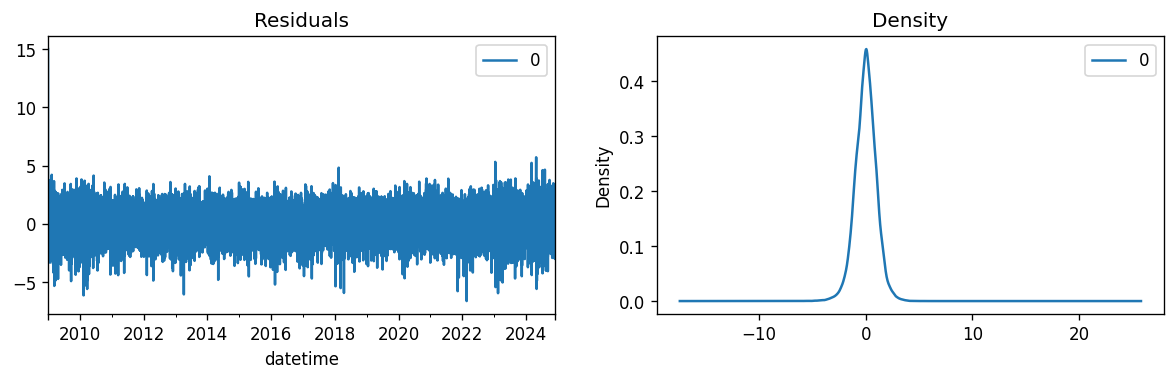

In [10]:
# Plot residual errors
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [11]:
train_df = train_df.drop("diff",axis=1)

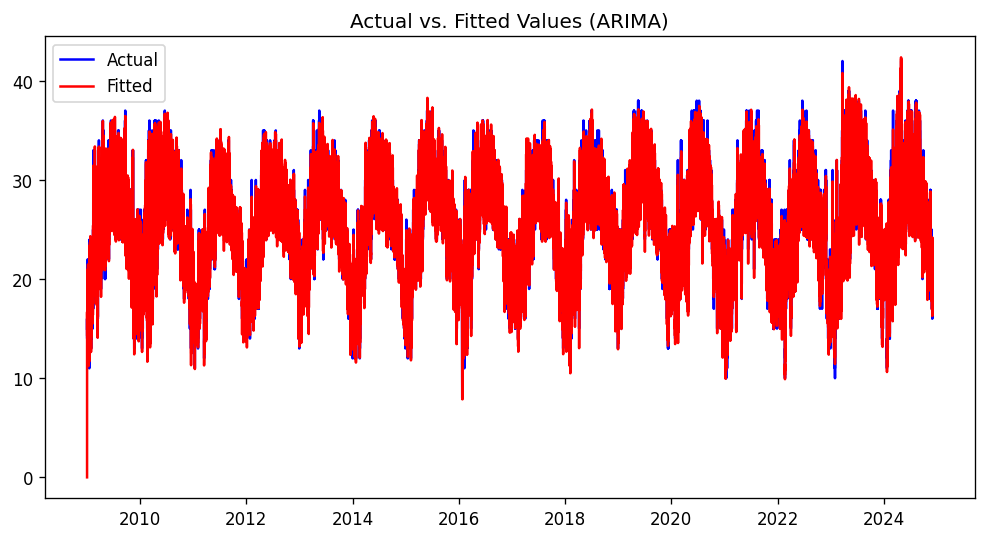

In [12]:
# Actual vs Fitted
fitted_values = model_fit.fittedvalues

# Ensure index matches train_df for proper plotting
fitted_series = pd.Series(fitted_values, index=train_df.index)

# Plot actual vs. fitted values
plt.figure(figsize=(10, 5))
plt.plot(train_df, label="Actual", color="blue", linestyle="-")
plt.plot(fitted_series, label="Fitted", color="red")
plt.title("Actual vs. Fitted Values (ARIMA)")
plt.legend()
plt.show()

In [13]:
# Forecast for the test period
forecast_steps = len(test_df)  # Ensure forecast matches test set length
fc = model_fit.forecast(steps=forecast_steps)  # Forecasted values

# Confidence interval (use get_forecast)
forecast_object = model_fit.get_forecast(steps=forecast_steps)
conf = forecast_object.conf_int(alpha=0.05)  # 95% confidence interval

# Convert forecast to Pandas Series with correct index
fc_series = pd.Series(fc, index=test_df.index)
# lower_series = pd.Series(conf[:, 0], index=test_df.index)
# upper_series = pd.Series(conf[:, 1], index=test_df.index)

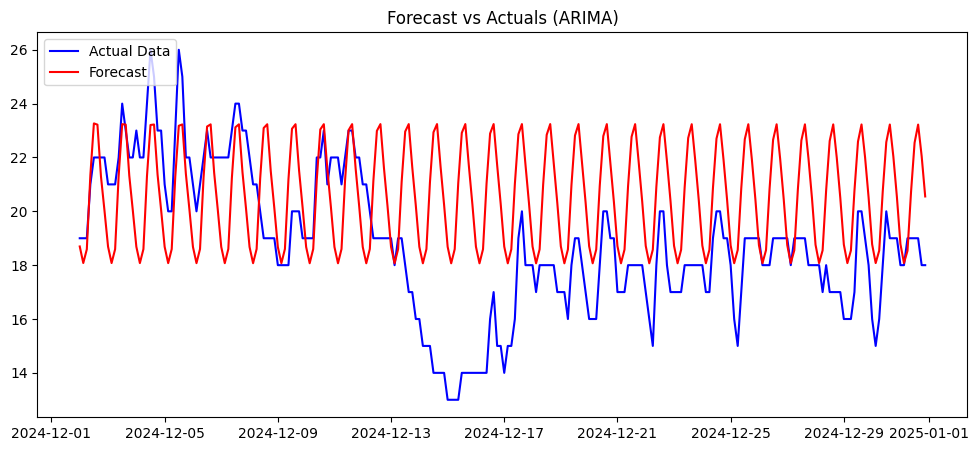

In [14]:
# Plot actual vs forecast
plt.figure(figsize=(12, 5), dpi=100)
# plt.plot(train_df, label='Training Data', color='black')
plt.plot(test_df, label='Actual Data', color='blue')
plt.plot(fc_series, label='Forecast', color='red')
# plt.fill_between(test_df.index, lower_series, upper_series, color='gray', alpha=0.2)

# Titles and labels
plt.title('Forecast vs Actuals (ARIMA)')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [15]:
df.to_csv("data.csv")

## Rolling forecast

In [16]:
rolling_predictions = []
history = list(train_df['temp'])  # Start with training data

forecast_steps = len(test_df)  # Number of steps to predict

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Rolling Forecast (One-Step Ahead)
for t in range(forecast_steps):
    # Fit the SARIMA/ARIMA model on the existing data
    # model = SARIMAX(history, 
    #                 order=(1,1,1), 
    #                 seasonal_order=(1,1,1,8), 
    #                 enforce_stationarity=False, enforce_invertibility=False)
    model = ARIMA(history, 
                    order=(2, 1, 1), 
                    enforce_stationarity=False, enforce_invertibility=False
                 )
    model_fit = model.fit()

    # Forecast the next step
    pred = model_fit.forecast(steps=1)[0]
    
    # Store the forecast
    rolling_predictions.append(pred)
    
    # Add the actual observation to history for the next step
    history.append(test_df['temp'].iloc[t])


rolling_pred_series = pd.Series(rolling_predictions, index=test_df.index)

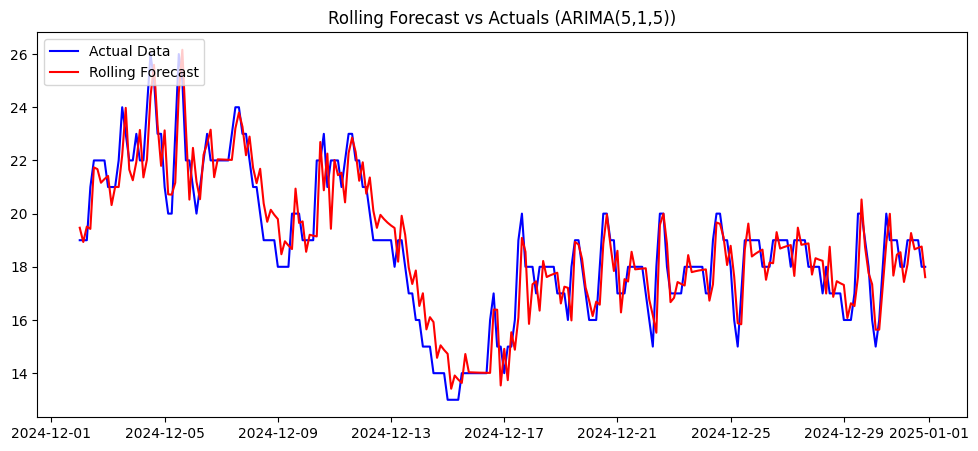

In [17]:
plt.figure(figsize=(12, 5), dpi=100)

# Plot historical data
# plt.plot(train_df['temp'], label='Training Data', color='black')
plt.plot(test_df['temp'], label='Actual Data', color='blue')

# Plot rolling forecast
plt.plot(rolling_pred_series, label='Rolling Forecast', color='red')

# Titles and labels
plt.title('Rolling Forecast vs Actuals (ARIMA(5,1,5))')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Ensure test data and predictions have the same length
rmse = np.sqrt(mean_squared_error(test_df['temp'], rolling_pred_series))

print(f'RMSE: {rmse:.4f}')

RMSE: 0.9596
